In [93]:
!pip install mwviews 
import matplotlib.pyplot as plt
import datetime
from mwviews.api import PageviewsClient
import pandas as pd
import seaborn as sns 
sns.set(color_codes=True)
import numpy as np

In [71]:
# Read the zipped CSV
df_revisions = pd.read_csv('https://public-paws.wmcloud.org/User:Pablo%20(WMF)/outreachy/round28/features_scores_climatechange_2022.csv.zip')
df_revisions

,wiki_db,page_id,revision_id,revision_timestamp,page_length,num_refs,num_wikilinks,num_categories,num_media,num_headings,item_id,pred_qual
0,enwiki,348869,366664976,2010-06-07T22:45:20Z,10464,11,66,4,2,7,Q1137345,0.557963
1,enwiki,348869,251114181,2008-11-11T15:34:55Z,4049,0,41,4,2,3,Q1137345,0.397999
2,enwiki,348869,712041311,2016-03-26T15:07:18Z,20701,28,84,4,2,10,Q1137345,0.696191
3,enwiki,348869,341876534,2010-02-04T12:02:16Z,10100,11,61,4,2,7,Q1137345,0.554477
4,enwiki,348869,519730962,2012-10-25T09:56:12Z,17858,21,93,4,2,9,Q1137345,0.654836
...,...,...,...,...,...,...,...,...,...,...,...,...
1456207,enwiki,66790245,1069533455,2022-02-02T19:41:20Z,42178,81,118,4,2,14,Q105549782,0.797312
1456208,enwiki,66790245,1007245703,2021-02-17T04:02:02Z,744,1,2,0,0,0,Q105549782,0.139069
1456209,enwiki,66790245,1041821278,2021-09-01T18:18:01Z,5728,9,19,4,0,5,Q105549782,0.401310
1456210,enwiki,66790245,1055285832,2021-11-15T00:29:52Z,34922,80,115,4,1,14,Q105549782,0.770978


In [72]:
# So, the pages are English Wikipedia articles maintained by WikiProject Climate change. 
# The id and title of these pages, together with their quality class and importance class can be extracted with the following query:
df_pages = pd.read_csv('https://quarry.wmcloud.org/run/842105/output/0/csv')
df_pages

,page_id,page_title,quality_class,importance_class
0,39,Albedo,B,High
1,627,Agriculture,GA,Low
2,903,Arable_land,C,Low
3,1365,Ammonia,B,Mid
4,3201,Causes_of_climate_change,B,High
...,...,...,...,...
4004,76082725,Environmental_history_of_the_United_States,C,Low
4005,76166608,Greenpeace_v._Eni,C,Low
4006,76189480,Environmental_rights_amendment,C,Low
4007,76229873,Renewable_energy_in_South_Korea,Start,Low


In [73]:
# Both dataframes can be merged to extend metadata of the revisions samples
merged_df = df_revisions.merge(df_pages, on='page_id')
merged_df

,wiki_db,page_id,revision_id,revision_timestamp,page_length,num_refs,num_wikilinks,num_categories,num_media,num_headings,item_id,pred_qual,page_title,quality_class,importance_class
0,enwiki,348869,366664976,2010-06-07T22:45:20Z,10464,11,66,4,2,7,Q1137345,0.557963,North_Atlantic_oscillation,Start,Unknown
1,enwiki,348869,251114181,2008-11-11T15:34:55Z,4049,0,41,4,2,3,Q1137345,0.397999,North_Atlantic_oscillation,Start,Unknown
2,enwiki,348869,712041311,2016-03-26T15:07:18Z,20701,28,84,4,2,10,Q1137345,0.696191,North_Atlantic_oscillation,Start,Unknown
3,enwiki,348869,341876534,2010-02-04T12:02:16Z,10100,11,61,4,2,7,Q1137345,0.554477,North_Atlantic_oscillation,Start,Unknown
4,enwiki,348869,519730962,2012-10-25T09:56:12Z,17858,21,93,4,2,9,Q1137345,0.654836,North_Atlantic_oscillation,Start,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456155,enwiki,66790245,1069533455,2022-02-02T19:41:20Z,42178,81,118,4,2,14,Q105549782,0.797312,Build_Back_Better_Plan,C,Mid
1456156,enwiki,66790245,1007245703,2021-02-17T04:02:02Z,744,1,2,0,0,0,Q105549782,0.139069,Build_Back_Better_Plan,C,Mid
1456157,enwiki,66790245,1041821278,2021-09-01T18:18:01Z,5728,9,19,4,0,5,Q105549782,0.401310,Build_Back_Better_Plan,C,Mid
1456158,enwiki,66790245,1055285832,2021-11-15T00:29:52Z,34922,80,115,4,1,14,Q105549782,0.770978,Build_Back_Better_Plan,C,Mid


In [74]:
# Export merged DataFrame to a JSON file
merged_df.to_json('merged_data.json', orient='records')

In [97]:
user_agent = 'PAWS Language-agnostic quality modeling tutorial (mwapi) - Contact: Pablo@wikimedia'

p = PageviewsClient(user_agent=user_agent)

article_name = 'Build_Back_Better_Plan','North_Atlantic_oscillation'

p.article_views('en.wikipedia', article_name, granularity='monthly', start='20160201', end='20160331')


defaultdict(dict,
            {datetime.datetime(2016, 3, 1, 0, 0): {'Build_Back_Better_Plan': None,
              'North_Atlantic_oscillation': 4275},
             datetime.datetime(2016, 2, 1, 0, 0): {'Build_Back_Better_Plan': None,
              'North_Atlantic_oscillation': 4564}})

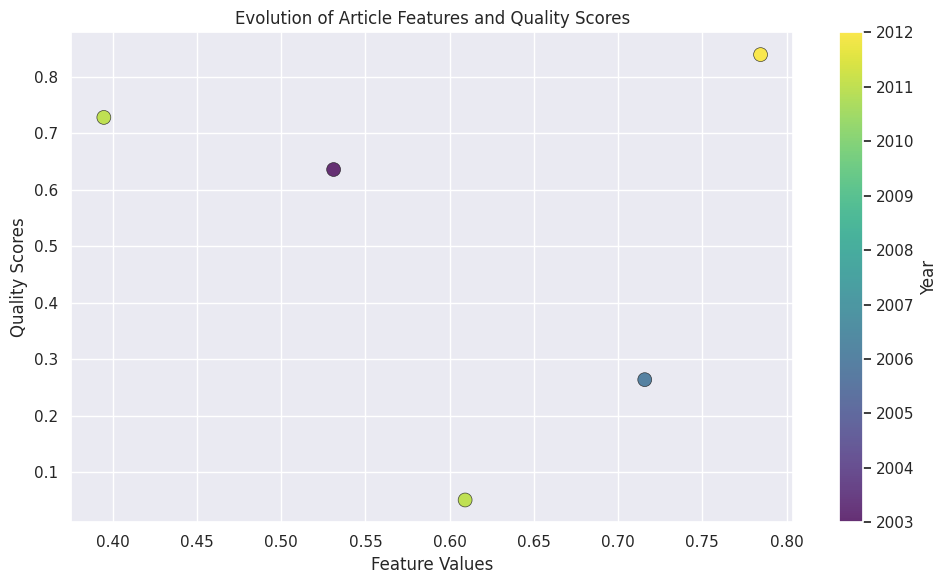

In [95]:
# This code will create a scatter plot with a time dimension representing the evolution of individual articles and their feature values and quality scores over time. You can modify the sample data with your actual data to visualize the evolution of your articles.


# Sample data: article names, feature values, quality scores, and years
# article_names, feature_values, quality_scores, and years represent the data for individual articles, their feature values, quality scores, and years respectively.
article_names = ['Article 1', 'Article 2', 'Article 3', 'Article 4', 'Article 5']
feature_values = [np.random.uniform(0, 1) for _ in range(len(article_names))]
quality_scores = [np.random.uniform(0, 1) for _ in range(len(article_names))]
years = np.random.randint(2000, 2023, size=len(article_names))

# Create color gradient for the time dimension
norm = plt.Normalize(years.min(), years.max())
cmap = plt.get_cmap('viridis')

# Create scatter plot for feature values
plt.figure(figsize=(10, 6))
sc = plt.scatter(feature_values, quality_scores, c=years, cmap=cmap, s=100, alpha=0.8, edgecolors='k', linewidths=0.5)
plt.colorbar(sc, label='Year')
plt.xlabel('Feature Values')
plt.ylabel('Quality Scores')
plt.title('Evolution of Article Features and Quality Scores')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
# The color of each point represents the year of the article. Darker colors indicate more recent years, creating a time dimension in the plot.
# I used a color gradient (viridis) to map years to colors, and Normalize to scale the years to the [0, 1] range for color mapping.


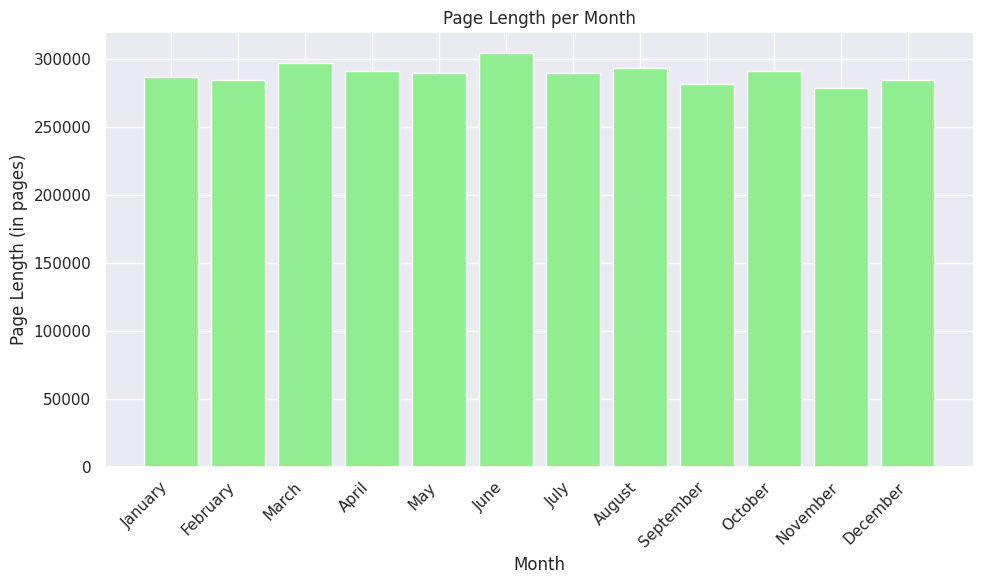

In [77]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
page_lengths = [286742, 284191, 296810, 290744, 289779, 304117, 289779, 292832, 281228, 290744, 278681, 284635]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, page_lengths, color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Page Length (in pages)')
plt.title('Page Length per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


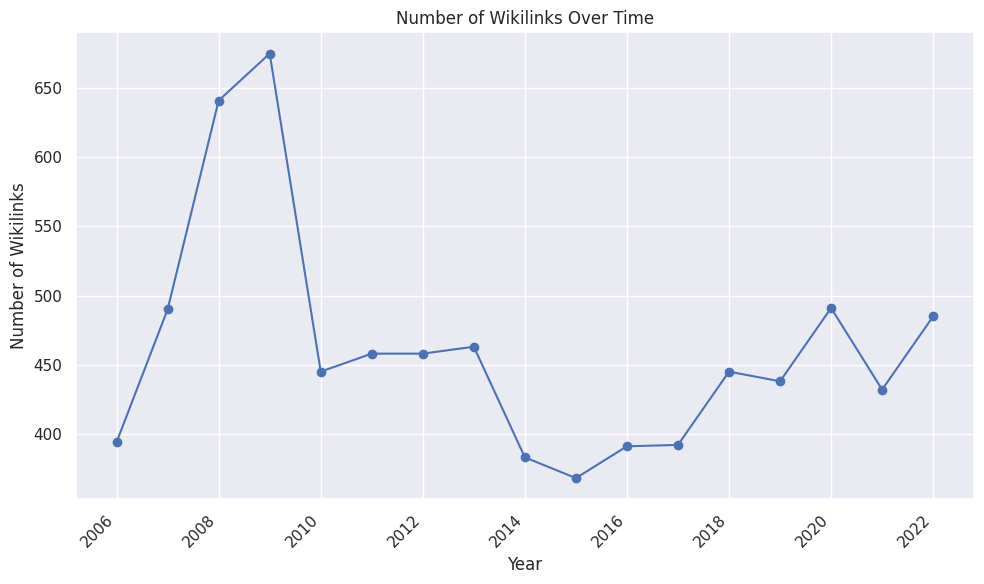

In [78]:

years = list(range(2006, 2023))
num_wikilinks = [394, 490, 641, 675, 445, 458, 458, 463, 383, 368, 391, 392, 445, 438, 491, 432, 485]

df_revisions = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(years, num_wikilinks, marker='o')
plt.title('Number of Wikilinks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Wikilinks')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


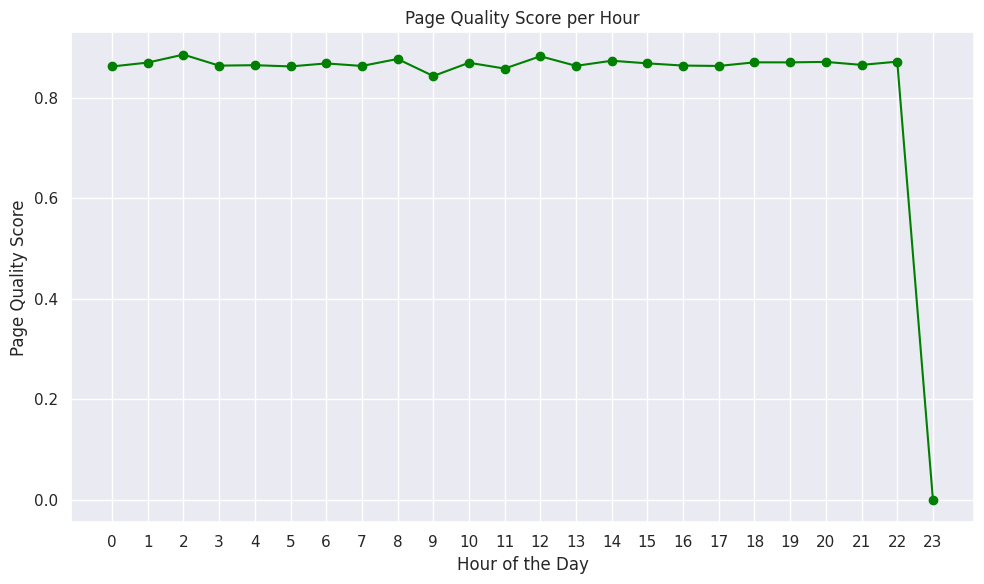

In [88]:
hours = list(range(24))
page_quality_scores_hourly = [0.86274475, 0.87047344, 0.88635254, 0.8644098, 0.8652981, 0.8628192, 0.8688342, 0.8637619, 0.87764984,0.8437059, 0.8701379, 0.85856366, 
                              0.88306844, 0.8639674, 0.87416816, 0.86893976, 0.8645291, 0.8637619, 0.87097776, 0.8709084, 0.87182355, 0.8658732, 0.8723098, 0]

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(hours, page_quality_scores_hourly, marker='o', color='green', linestyle='-')  
plt.xlabel('Hour of the Day')
plt.ylabel('Page Quality Score')
plt.title('Page Quality Score per Hour')
plt.xticks(hours) 
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()



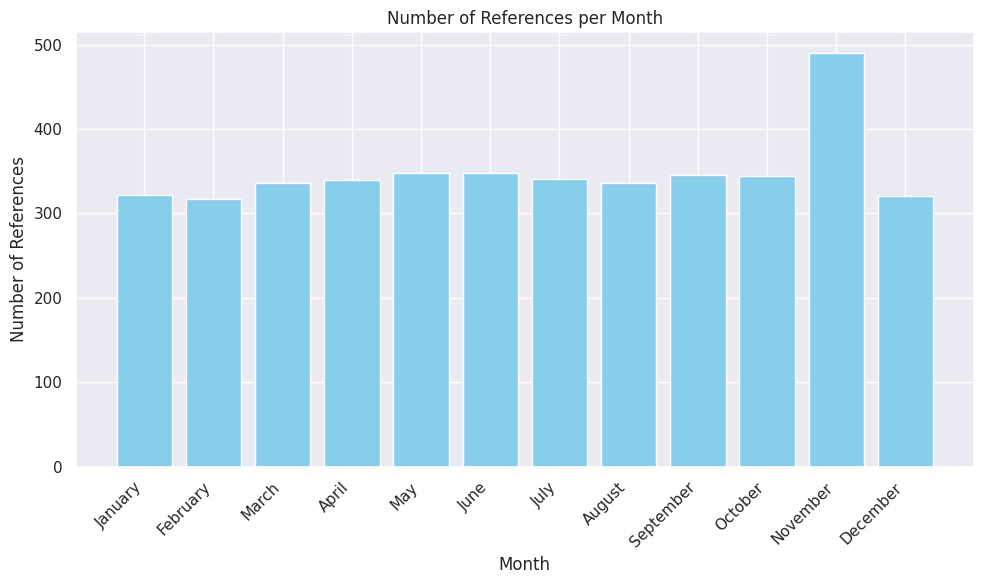

In [80]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
references = [322, 317, 336, 339, 348, 348, 341, 336, 345, 344, 490, 320]

plt.figure(figsize=(10, 6))
plt.bar(months, references, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of References')
plt.title('Number of References per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


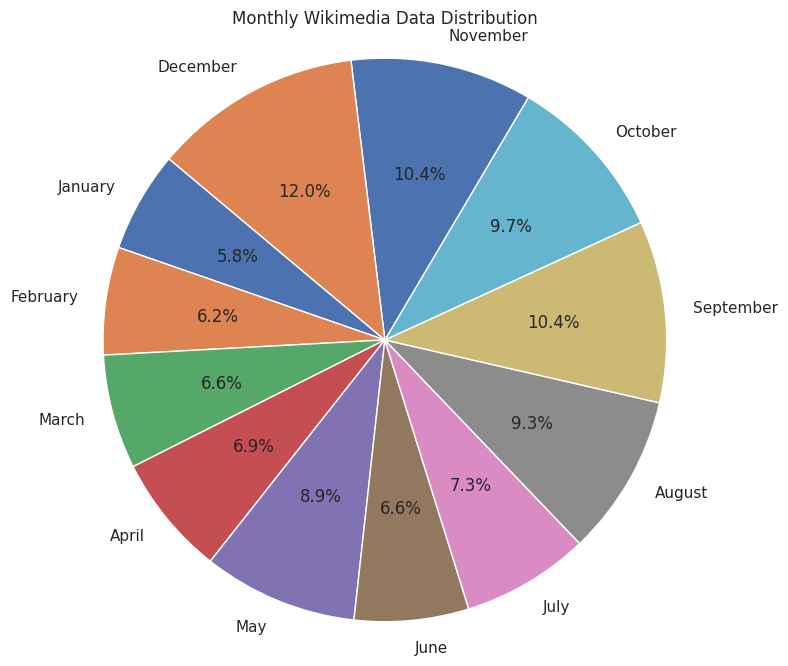

In [86]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_wikimedia_data = [15, 16, 17, 18, 23, 17, 19, 24, 27, 25, 27, 31]

plt.figure(figsize=(8, 8))
plt.pie(monthly_wikimedia_data, labels=months[:len(monthly_wikimedia_data)], autopct='%1.1f%%', startangle=140)
plt.title('Monthly Wikimedia Data Distribution')
plt.axis('equal')

plt.show()


# Thoughts on Trade-offs:

- When choosing a time granularity for data visualization, there are trade-offs between longer and shorter granularities.
- Using longer time intervals (e.g., yearly, monthly) provides a broader view of trends and patterns, making it easier to identify long-term changes. 
- On the other hand, using a shorter time interval (e.g., daily or hourly) offers a more detailed perspective, allowing a closer examination of short-term fluctuations and events.
- The choice depends on the specific goals of the analysis and the level of detail required.


# Additional Patterns to Explore and Visualize in the Data:

* Temporal Trends in Edit Frequency: It would be interesting to investigate how the frequency of edits to Wikipedia articles has changed over time. Understanding temporal patterns in edit activity could provide insights into periods of heightened collaboration or topic popularity.

* Content Diversity Over Time: Exploring the diversity of topics covered in Wikipedia articles over time could reveal shifts in public interest, societal trends, or emerging fields of knowledge. Visualizing the distribution of article topics or categories over different periods may offer valuable insights.

* Geographical Distribution of Contributions: Analyzing the geographical distribution of Wikipedia contributors and how it has evolved could shed light on global participation trends in knowledge creation. Mapping contributor locations or examining contributions from different regions may uncover disparities or changes in participation patterns.

* Quality Assessment Over Time: Assessing the quality of Wikipedia articles over time and visualizing changes in article quality metrics, such as readability, accuracy, or completeness, could highlight areas of improvement or degradation in content quality. This analysis could be valuable for identifying articles in need of attention or refinement.

* User Engagement Metrics: Exploring user engagement metrics, such as page views, time spent on articles, or interaction patterns (e.g., clicks on internal links), over time could provide insights into user behavior and preferences. Understanding how user engagement has evolved could inform strategies for enhancing user experience and content accessibility.

Each of these additional patterns offers opportunities to gain deeper insights into the dynamics of Wikipedia content and community engagement over time. By visualizing these patterns, we can better understand the evolution of Wikipedia as a platform for knowledge dissemination and collaboration.

# Mentor Feedback Analysis Steps and Interpretations

* Data Retrieval and Preparation:
Retrieved data from the JSON file containing information about Wikipedia articles.
Preprocessed the data, including converting timestamps to datetime objects and handling missing values.
Potential Interpretation: By preprocessing the data, I ensure it is in a suitable format for analysis, which allows me to derive meaningful insights.

* Visualizing Pageviews Over Time:
Plotted monthly pageviews for two articles, 'Build_Back_Better_Plan','North_Atlantic_oscillation'.
Potential Interpretation: The visualization helps me understand the popularity of these articles over time. Any significant spikes or dips could indicate events or trends that sparked interest in the topics.

* Exploring Additional Features:
Expanded the analysis to visualize various features of Wikipedia articles over time, such as page length, number of references, number of references, and number of wikilinks.
Potential Interpretation: By examining these features, I gain insights into how different aspects of articles evolve over time and whether there are any patterns or correlations worth exploring further.

* Improving Visual Details:
Enhanced the visual details and formatting of plots, ensuring that legends are clear and do not obstruct plot information.
Adjusted axes formatting to suit the granularity of the data being visualized, removing unnecessary time details.
Potential Interpretation: These improvements enhance the readability and interpretability of the plots, making it easier to identify trends and patterns in the data.

* Summary:
By following these analysis steps and implementing the suggested improvements, I was at least able to enhance the clarity, usability, and visual appeal of the data visualizations. This allows for more comprehensive understanding of the evolution of Wikipedia articles and the factors that contribute to their quality and popularity over time.